In [628]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # 라벨 인코더

# 글꼴 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus= False)
plt.style.use('ggplot')
pd.options.display.max_columns  = 100
sns.set()

# 데이터 불러오기 ( train, y_train, y_test )

In [695]:
train = pd.read_csv('data/train.csv')
print(train.shape)

X_test = pd.read_csv('data/test.csv')
print(X_test.shape)

y_test = pd.read_csv('data/submission_제출양식.csv')
print(y_test.shape)

(210457, 14)
(91774, 13)
(91774, 2)


In [696]:
train.columns

Index(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time'],
      dtype='object')

In [697]:
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


In [698]:
y_test.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


## 요일 생성

### train

In [699]:
train['date'] = pd.to_datetime(train['date'].astype(str))
train['요일'] = train['date'].dt.dayofweek
train['일'] = train['date'].dt.day
weekday = "월화수목금토일"
# train["요일명"] = train["요일"].map(lambda x : weekday[x])
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,1,15
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,1,15
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,1,15
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,1,15
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,1,15


In [700]:
train.describe(include="object")

,route_nm,now_station,now_arrive_time,next_station
count,210457,210457,210457,210457
unique,21,348,20,351
top,365-22,남국원(아라방면),08시,은남동
freq,31941,3361,13838,3519


### X_test

In [701]:
X_test['date'] = pd.to_datetime(X_test['date'].astype(str))
X_test['요일'] = X_test['date'].dt.dayofweek
X_test['일'] = X_test['date'].dt.day
weekday = "월화수목금토일"
# X_test["요일명"] = X_test["요일"].map(lambda x : weekday[x])
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,요일,일
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353,1,29
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624,1,29
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350,1,29
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933,1,29
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355,1,29


In [702]:
X_test.describe(include="object")

,route_nm,now_station,now_arrive_time,next_station
count,91774,91774,91774,91774
unique,21,349,19,350
top,365-22,아라주공아파트,18시,은남동
freq,14293,1487,6216,1550


# 정류장 명 숫자로 변경


### train

In [703]:
# 인코더 생성
station_encoder = LabelEncoder()
station_encoder

# 인코딩
_station = list(train['now_station'].values) + list(train['next_station'].values) # train 의 모든 정류장 이름
station_set = set(_station)

print(len(station_set))

351


In [704]:
station_encoder.fit(list(station_set))

LabelEncoder()

In [705]:
# 학습, 시험 데이터의 정류장 정보 치환
train['now_station'] = station_encoder.transform(train['now_station'])
train['next_station'] = station_encoder.transform(train['next_station'])
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,15
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,15
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,15
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,15
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,15


### X_test

In [706]:
# 인코더 생성
station_encoder = LabelEncoder()
station_encoder

# 인코딩
_station = list(X_test['now_station'].values) + list(X_test['next_station'].values) # X_test 의 모든 정류장 이름
station_set = set(_station)

print(len(station_set))

351


In [707]:
station_encoder.fit(list(station_set))

LabelEncoder()

In [708]:
# 학습, 시험 데이터의 정류장 정보 치환
X_test['now_station'] = station_encoder.transform(X_test['now_station'])
X_test['next_station'] = station_encoder.transform(X_test['next_station'])
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,요일,일
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353,1,29
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624,1,29
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350,1,29
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933,1,29
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355,1,29


# 요일 설정

### train

In [709]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train['date'].dt.weekday
train['weekday'].value_counts()

1    31311
3    30968
2    30818
0    30353
4    30003
5    28806
6    28198
Name: weekday, dtype: int64

### X_test

In [710]:
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['weekday'] = X_test['date'].dt.weekday
X_test['weekday'].value_counts()

1    26435
4    13541
0    13503
6    12609
5    10845
3    10182
2     4659
Name: weekday, dtype: int64

## 주말 평일 설정

In [711]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일,weekday
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,15,1
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,15,1
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,15,1
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,15,1
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,15,1


In [712]:
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,요일,일,weekday
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353,1,29,1
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624,1,29,1
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350,1,29,1
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933,1,29,1
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355,1,29,1


### train

In [713]:
train['week']=train['weekday'].apply(lambda x: 0 if 1 <= x <= 5 else 1)
train['week'].value_counts()

0    151906
1     58551
Name: week, dtype: int64

In [714]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일,weekday,week
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,15,1,0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,15,1,0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,15,1,0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,15,1,0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,15,1,0


### X_test

In [715]:
X_test['week']=X_test['weekday'].apply(lambda x: 0 if 1 <= x <= 5 else 1)
X_test['week'].value_counts()

0    65662
1    26112
Name: week, dtype: int64

In [716]:
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,요일,일,weekday,week
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353,1,29,1,0
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624,1,29,1,0
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350,1,29,1,0
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933,1,29,1,0
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355,1,29,1,0


# 출퇴근 시간

In [717]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일,weekday,week
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,15,1,0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,15,1,0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,15,1,0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,15,1,0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,15,1,0


### train

출근시간: 06 ~ 07시  /  work     :  1 <br>
점심시간: 12 ~ 13시  / lunch    :  2 <br>
퇴근시간: 16 ~ 19시  / offwork  :  3 <br>
usually  :  0 <br>






In [718]:
train['traffic']='0'
train.loc[ (train['now_arrive_time']>= '06시') & (train['now_arrive_time']<='07시') ,['traffic'] ]= '1'
train.loc[ (train['now_arrive_time']>= '12시') & (train['now_arrive_time']<='13시') ,['traffic'] ]= '2'
train.loc[ (train['now_arrive_time']>= '16시') & (train['now_arrive_time']<='19시') ,['traffic'] ]= '3'

In [719]:
train['traffic'].value_counts()

0    109009
3     52828
2     26630
1     21990
Name: traffic, dtype: int64

In [720]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,요일,일,weekday,week,traffic
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,15,1,0,1
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,15,1,0,1
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,15,1,0,1
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,15,1,0,1
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,15,1,0,1


## X_test

In [721]:
X_test['traffic']='0'
X_test.loc[ (X_test['now_arrive_time']>= '06시') & (X_test['now_arrive_time']<='07시') ,['traffic'] ]= '1'
X_test.loc[ (X_test['now_arrive_time']>= '12시') & (X_test['now_arrive_time']<='13시') ,['traffic'] ]= '2'
X_test.loc[ (X_test['now_arrive_time']>= '16시') & (X_test['now_arrive_time']<='19시') ,['traffic'] ]= '3'

In [722]:
X_test['traffic'].value_counts()

0    47249
3    24026
2    10605
1     9894
Name: traffic, dtype: int64

In [723]:
X_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,요일,일,weekday,week,traffic
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353,1,29,1,0,1
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624,1,29,1,0,1
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350,1,29,1,0,0
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933,1,29,1,0,0
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355,1,29,1,0,0


# 컬럼 드랍

In [724]:
train_drop = train[['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude', 'now_longitude', 'now_arrive_time', 'week', 'next_longitude']]

## train

In [725]:
train = train[['now_station', 'distance',  'next_station',  '요일', '일', 'weekday', 'traffic', 'next_arrive_time']]
train.shape

(210457, 8)

In [726]:
train.head()

,now_station,distance,next_station,요일,일,weekday,traffic,next_arrive_time
0,239,266.0,227,1,15,1,1,24
1,227,333.0,228,1,15,1,1,36
2,228,415.0,235,1,15,1,1,40
3,41,578.0,249,1,15,1,1,42
4,63,374.0,221,1,15,1,1,64


## X_test

In [727]:
X_test = X_test[['now_station', 'distance',  'next_station',  '요일', '일', 'weekday', 'traffic']]
X_test.shape

(91774, 7)

In [728]:
X_test.head()

,now_station,distance,next_station,요일,일,weekday,traffic
0,227,333.0,228,1,29,1,1
1,228,415.0,235,1,29,1,1
2,323,417.0,59,1,29,1,0
3,59,334.0,183,1,29,1,0
4,183,550.0,285,1,29,1,0


# 데이터 타입 변경 (trian, X_test )

In [730]:
train['traffic'] = train['traffic'].astype(int)
X_test['traffic'] = X_test['traffic'].astype(int)

In [731]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   now_station   91774 non-null  int32  
 1   distance      91774 non-null  float64
 2   next_station  91774 non-null  int32  
 3   요일            91774 non-null  int64  
 4   일             91774 non-null  int64  
 5   weekday       91774 non-null  int64  
 6   traffic       91774 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 3.9 MB


# 셋 나누기 

In [732]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [733]:
X_train.head()

,now_station,distance,next_station,요일,일,weekday,traffic
0,239,266.0,227,1,15,1,1
1,227,333.0,228,1,15,1,1
2,228,415.0,235,1,15,1,1
3,41,578.0,249,1,15,1,1
4,63,374.0,221,1,15,1,1


In [734]:
X_test.head()

,now_station,distance,next_station,요일,일,weekday,traffic
0,227,333.0,228,1,29,1,1
1,228,415.0,235,1,29,1,1
2,323,417.0,59,1,29,1,0
3,59,334.0,183,1,29,1,0
4,183,550.0,285,1,29,1,0


In [735]:
y_trian

0         24
1         36
2         40
3         42
4         64
          ..
210452    96
210453    50
210454    16
210455    38
210456    24
Name: next_arrive_time, Length: 210457, dtype: int64

In [736]:
y_test

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0
...,...,...
91769,302350,0
91770,302351,0
91771,302352,0
91772,302353,0


In [737]:
X_train.shape, X_test.shape, y_train.shape ,y_test.shape

((210457, 7), (91774, 7), (210457,), (91774, 2))

In [667]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   now_station   210457 non-null  int32  
 1   distance      210457 non-null  float64
 2   next_station  210457 non-null  int32  
 3   요일            210457 non-null  int64  
 4   일             210457 non-null  int64  
 5   weekday       210457 non-null  int64  
 6   traffic       210457 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 8.8 MB


In [668]:
X_test

,now_station,distance,next_station,요일,일,weekday,traffic
0,227,333.0,228,1,29,1,1
1,228,415.0,235,1,29,1,1
2,323,417.0,59,1,29,1,0
3,59,334.0,183,1,29,1,0
4,183,550.0,285,1,29,1,0
...,...,...,...,...,...,...,...
91769,255,272.0,10,1,5,1,0
91770,10,447.0,245,1,5,1,0
91771,245,418.0,22,1,5,1,0
91772,22,140.0,287,1,5,1,0


In [670]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   now_station   210457 non-null  int32  
 1   distance      210457 non-null  float64
 2   next_station  210457 non-null  int32  
 3   요일            210457 non-null  int64  
 4   일             210457 non-null  int64  
 5   weekday       210457 non-null  int64  
 6   traffic       210457 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 8.8 MB


In [671]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   now_station   91774 non-null  int32  
 1   distance      91774 non-null  float64
 2   next_station  91774 non-null  int32  
 3   요일            91774 non-null  int64  
 4   일             91774 non-null  int64  
 5   weekday       91774 non-null  int64  
 6   traffic       91774 non-null  object 
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 4.2+ MB


In [672]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   now_station   91774 non-null  int32  
 1   distance      91774 non-null  float64
 2   next_station  91774 non-null  int32  
 3   요일            91774 non-null  int64  
 4   일             91774 non-null  int64  
 5   weekday       91774 non-null  int64  
 6   traffic       91774 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 3.9 MB


# 학습데이터 

In [689]:
input_var = list(train.columns) 
input_var.remove('next_arrive_time')

In [690]:
X_train = train[input_var] # 학습 데이터 선택
X_test = train['next_arrive_time'] # target 값인 Y 데이터 선택

In [693]:
X_test = y_train[input_var] # 시험 데이터도 선택

KeyError: "None of [Index(['now_station', 'distance', 'next_station', '요일', '일', 'weekday',\n       'traffic'],\n      dtype='object')] are in the [index]"

In [692]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((210457, 7), (210457,), (210457,), (91774, 2))

In [436]:
X_train.head()

,now_station,distance,next_station,요일,일,weekday,traffic
0,239,266.0,227,1,15,1,1
1,227,333.0,228,1,15,1,1
2,228,415.0,235,1,15,1,1
3,41,578.0,249,1,15,1,1
4,63,374.0,221,1,15,1,1


In [437]:
X_test.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

In [438]:
y_train.head()

,now_station,distance,next_station,요일,일,weekday,traffic
0,227,333.0,228,1,29,1,1
1,228,415.0,235,1,29,1,1
2,323,417.0,59,1,29,1,0
3,59,334.0,183,1,29,1,0
4,183,550.0,285,1,29,1,0


In [435]:
y_test.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


# XGBOOST


In [429]:
# 글꼴 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus= False)
plt.style.use('ggplot')
pd.options.display.max_columns  = 100

In [430]:
from xgboost import XGBRegressor

In [773]:
import xgboost as xgb

In [771]:
xgb = XGBRegressor(random_sate=1234, max_depth=10, n_estimators=300)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[19:29:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { random_sate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [742]:
print("훈련 세트 정확도: {:.8f}".format(xgb.score(X_train, y_train)))

훈련 세트 정확도: 0.62446662


In [745]:
print("테스트 세트 정확도: {:.8f}".format(xgb.score(X_test, xgb_pred)))

테스트 세트 정확도: 1.00000000


In [776]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [777]:
model_xgb.fit(X_train, y_train)

[19:35:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [778]:
xgb_pred = xgb.predict(X_test)

AttributeError: module 'xgboost' has no attribute 'predict'

In [782]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [785]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [786]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[19:38:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [787]:
score

array([1.4207543 , 1.42356365, 1.10919951, 0.99385398, 0.91857136])

In [792]:
Xgboost score

SyntaxError: invalid syntax (<ipython-input-792-2c78305b6fc2>, line 1)

In [754]:
pd.DataFrame(xgb_pred)

,0
0,66.446129
1,129.199219
2,114.953415
3,56.397346
4,155.797943
...,...
91769,99.988625
91770,70.291321
91771,116.657333
91772,37.365311


In [ ]:
y_test

In [789]:
score

array([1.4207543 , 1.42356365, 1.10919951, 0.99385398, 0.91857136])

# 파일저장

In [793]:
y_test = pd.read_csv('data/submission_제출양식.csv')
print(y_test.shape)

(91774, 2)


In [795]:
score.shape

(5,)

In [794]:
y_test['next_arrive_time'] = score

ValueError: Length of values does not match length of index

In [768]:
y_test

,id,next_arrive_time
0,210457,66.446129
1,210458,129.199219
2,210459,114.953415
3,210460,56.397346
4,210461,155.797943
...,...,...
91769,302350,99.988625
91770,302351,70.291321
91771,302352,116.657333
91772,302353,37.365311


In [758]:
import pandas as pd

In [769]:
y_test.to_csv('bus.csv', index=False)

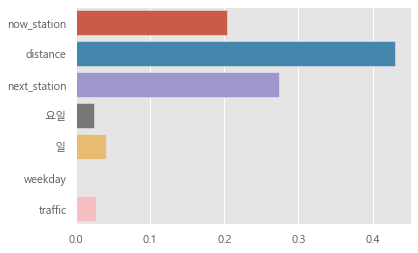

In [298]:
feature_names = X_train.columns.tolist()

sns.barplot(x=xgb.feature_importances_, y = feature_names)

In [267]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   now_station   91774 non-null  int32  
 1   distance      91774 non-null  float64
 2   next_station  91774 non-null  int32  
 3   요일            91774 non-null  int64  
 4   일             91774 non-null  int64  
 5   weekday       91774 non-null  int64  
 6   week          91774 non-null  int64  
 7   traffic       91774 non-null  int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 4.6 MB


In [904]:
xgb.feature_importances_

AttributeError: Feature importance is not defined for Booster type None

In [125]:
print("훈련 세트 정확도: {:.8f}".format(xgb.score(X_train, y_train)))

훈련 세트 정확도: 0.87025392


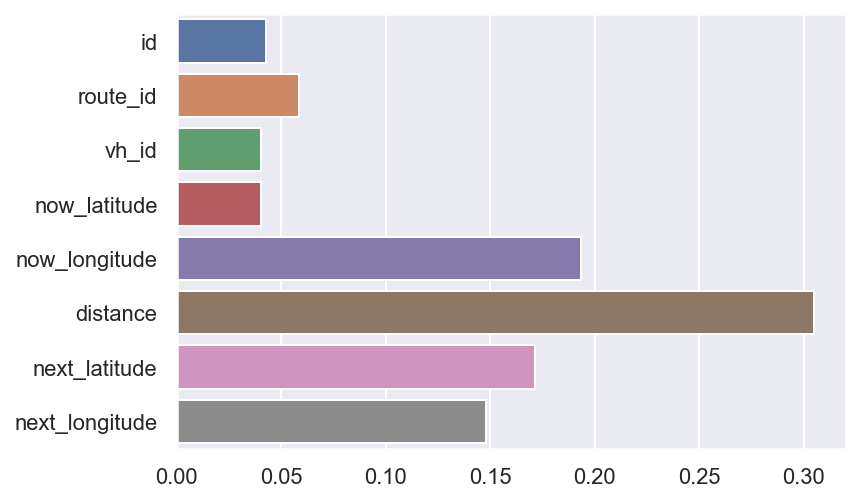

In [123]:
feature_names = X_train.columns.tolist()

sns.barplot(x=xgb.feature_importances_, y = feature_names)

In [116]:

print('훈련 정확도: {:.8f}'.format(xgb.score(X-train,y_train)))
print("테스트 세트 정확도: {:.8f}".format(xgb.score(y_test, y_test)))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields date, next_station, now_arrive_time, now_station, route_nm

In [119]:
X-train

,date,distance,id,next_arrive_time,next_latitude,next_longitude,next_station,now_arrive_time,now_latitude,now_longitude,now_station,route_id,route_nm,vh_id
0,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
210453,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
210454,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0
210455,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [114]:
X.columns

Index(['id', 'route_id', 'vh_id', 'now_latitude', 'now_longitude', 'distance',
       'next_latitude', 'next_longitude'],
      dtype='object')

In [96]:
train.describe(include='object')

,date,route_nm,now_station,now_arrive_time,next_station
count,210457,210457,210457,210457,210457
unique,14,21,348,20,351
top,2019-10-15,365-22,남국원(아라방면),08시,은남동
freq,15980,31941,3361,13838,3519


In [6]:
list(train['now_station'].value_counts())

[3361,
 3098,
 3093,
 3056,
 2789,
 2728,
 2606,
 2474,
 2363,
 2290,
 2281,
 2232,
 2215,
 2192,
 2166,
 2106,
 2090,
 2047,
 2021,
 1997,
 1939,
 1861,
 1846,
 1841,
 1830,
 1768,
 1566,
 1535,
 1514,
 1486,
 1450,
 1440,
 1371,
 1365,
 1343,
 1313,
 1311,
 1292,
 1264,
 1240,
 1235,
 1209,
 1199,
 1187,
 1180,
 1172,
 1160,
 1121,
 1115,
 1109,
 1104,
 1100,
 1090,
 1071,
 1044,
 1044,
 1039,
 1038,
 1037,
 1034,
 1034,
 1022,
 1020,
 1020,
 1009,
 978,
 964,
 953,
 942,
 936,
 921,
 912,
 909,
 906,
 906,
 875,
 874,
 857,
 854,
 828,
 820,
 814,
 810,
 807,
 779,
 774,
 763,
 763,
 762,
 758,
 749,
 729,
 725,
 708,
 704,
 691,
 690,
 686,
 686,
 662,
 654,
 651,
 641,
 640,
 632,
 628,
 624,
 624,
 613,
 610,
 582,
 580,
 579,
 577,
 574,
 573,
 572,
 570,
 568,
 568,
 566,
 563,
 559,
 546,
 545,
 544,
 534,
 533,
 521,
 518,
 517,
 511,
 504,
 504,
 502,
 502,
 498,
 496,
 492,
 492,
 488,
 487,
 474,
 467,
 465,
 464,
 464,
 461,
 461,
 460,
 454,
 449,
 449,
 445,
 443,
 440,

In [8]:
list(train['now_station'].values)

['제주대학교입구',
 '제대마을',
 '제대아파트',
 '남국원(아라방면)',
 '도호동',
 '한라중학교/부영아파트',
 '대림2차아파트',
 '롯데마트',
 '원노형',
 '노형오거리',
 '남녕고등학교',
 '한라병원',
 '삼무공원사거리',
 '제원아파트',
 '은남동',
 '도호동',
 '연동주민센터',
 '제주도청 신제주로터리',
 '월구마을',
 '동성마을',
 '제주버스터미널',
 '한국병원',
 '남서광마을입구',
 '남서광마을',
 '탐라장애인 종합복지관',
 '제주시청(아라방면)',
 '고산동산(아라방면)',
 '제주지방법원(아라방면)',
 '남국원(아라방면)',
 '아라초등학교',
 '아라주공아파트',
 '인다마을',
 '남국사',
 '제주대학교입구',
 '제대마을',
 '제대아파트',
 '남국원(아라방면)',
 '연동대림1차아파트',
 '케이티앤지',
 '롯데마트',
 '원노형',
 '노형오거리',
 '남녕고등학교',
 '한라병원',
 '삼무공원사거리',
 '제원아파트',
 '은남동',
 '도호동',
 '연동주민센터',
 '제주도청 신제주로터리',
 '월구마을',
 '동성마을',
 '제주버스터미널',
 '한국병원',
 '남서광마을입구',
 '남서광마을',
 '고산동산(아라방면)',
 '제주지방법원(아라방면)',
 '제주중앙여자고등학교(아라방면)',
 '제주여자중고등학교(아라방면)',
 '아라주공아파트',
 '인다마을',
 '제주대학교병원',
 '제주대학교입구',
 '제주여자중고등학교(아라방면)',
 '고산동산(아라방면)',
 '도호동',
 '한라중학교/부영아파트',
 '대림2차아파트',
 '연동대림1차아파트',
 '케이티앤지',
 '롯데마트',
 '원노형',
 '노형오거리',
 '남녕고등학교',
 '한라병원',
 '삼무공원사거리',
 '제원아파트',
 '은남동',
 '도호동',
 '연동주민센터',
 '제주도청 신제주로터리',
 '연동입구',
 '오라3동',
 '월구마을',
 '동성마을',
 '제주버스터미널',
 '한국병원',
 '남서광